In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from sharpening_functions import *

In [15]:
original_small = np.zeros((5, 5))
original_med = np.zeros((50, 50))
original_large = np.zeros((500, 500))

original_small[2, 2] = 0.5
original_med[20:30, 20:30] = 0.5
original_large[200:300, 200:300] = 0.5

sharpened_small = esrgan_sharpening_img(original_small)
sharpened_med = esrgan_sharpening_img(original_med)
sharpened_large = esrgan_sharpening_img(original_large)

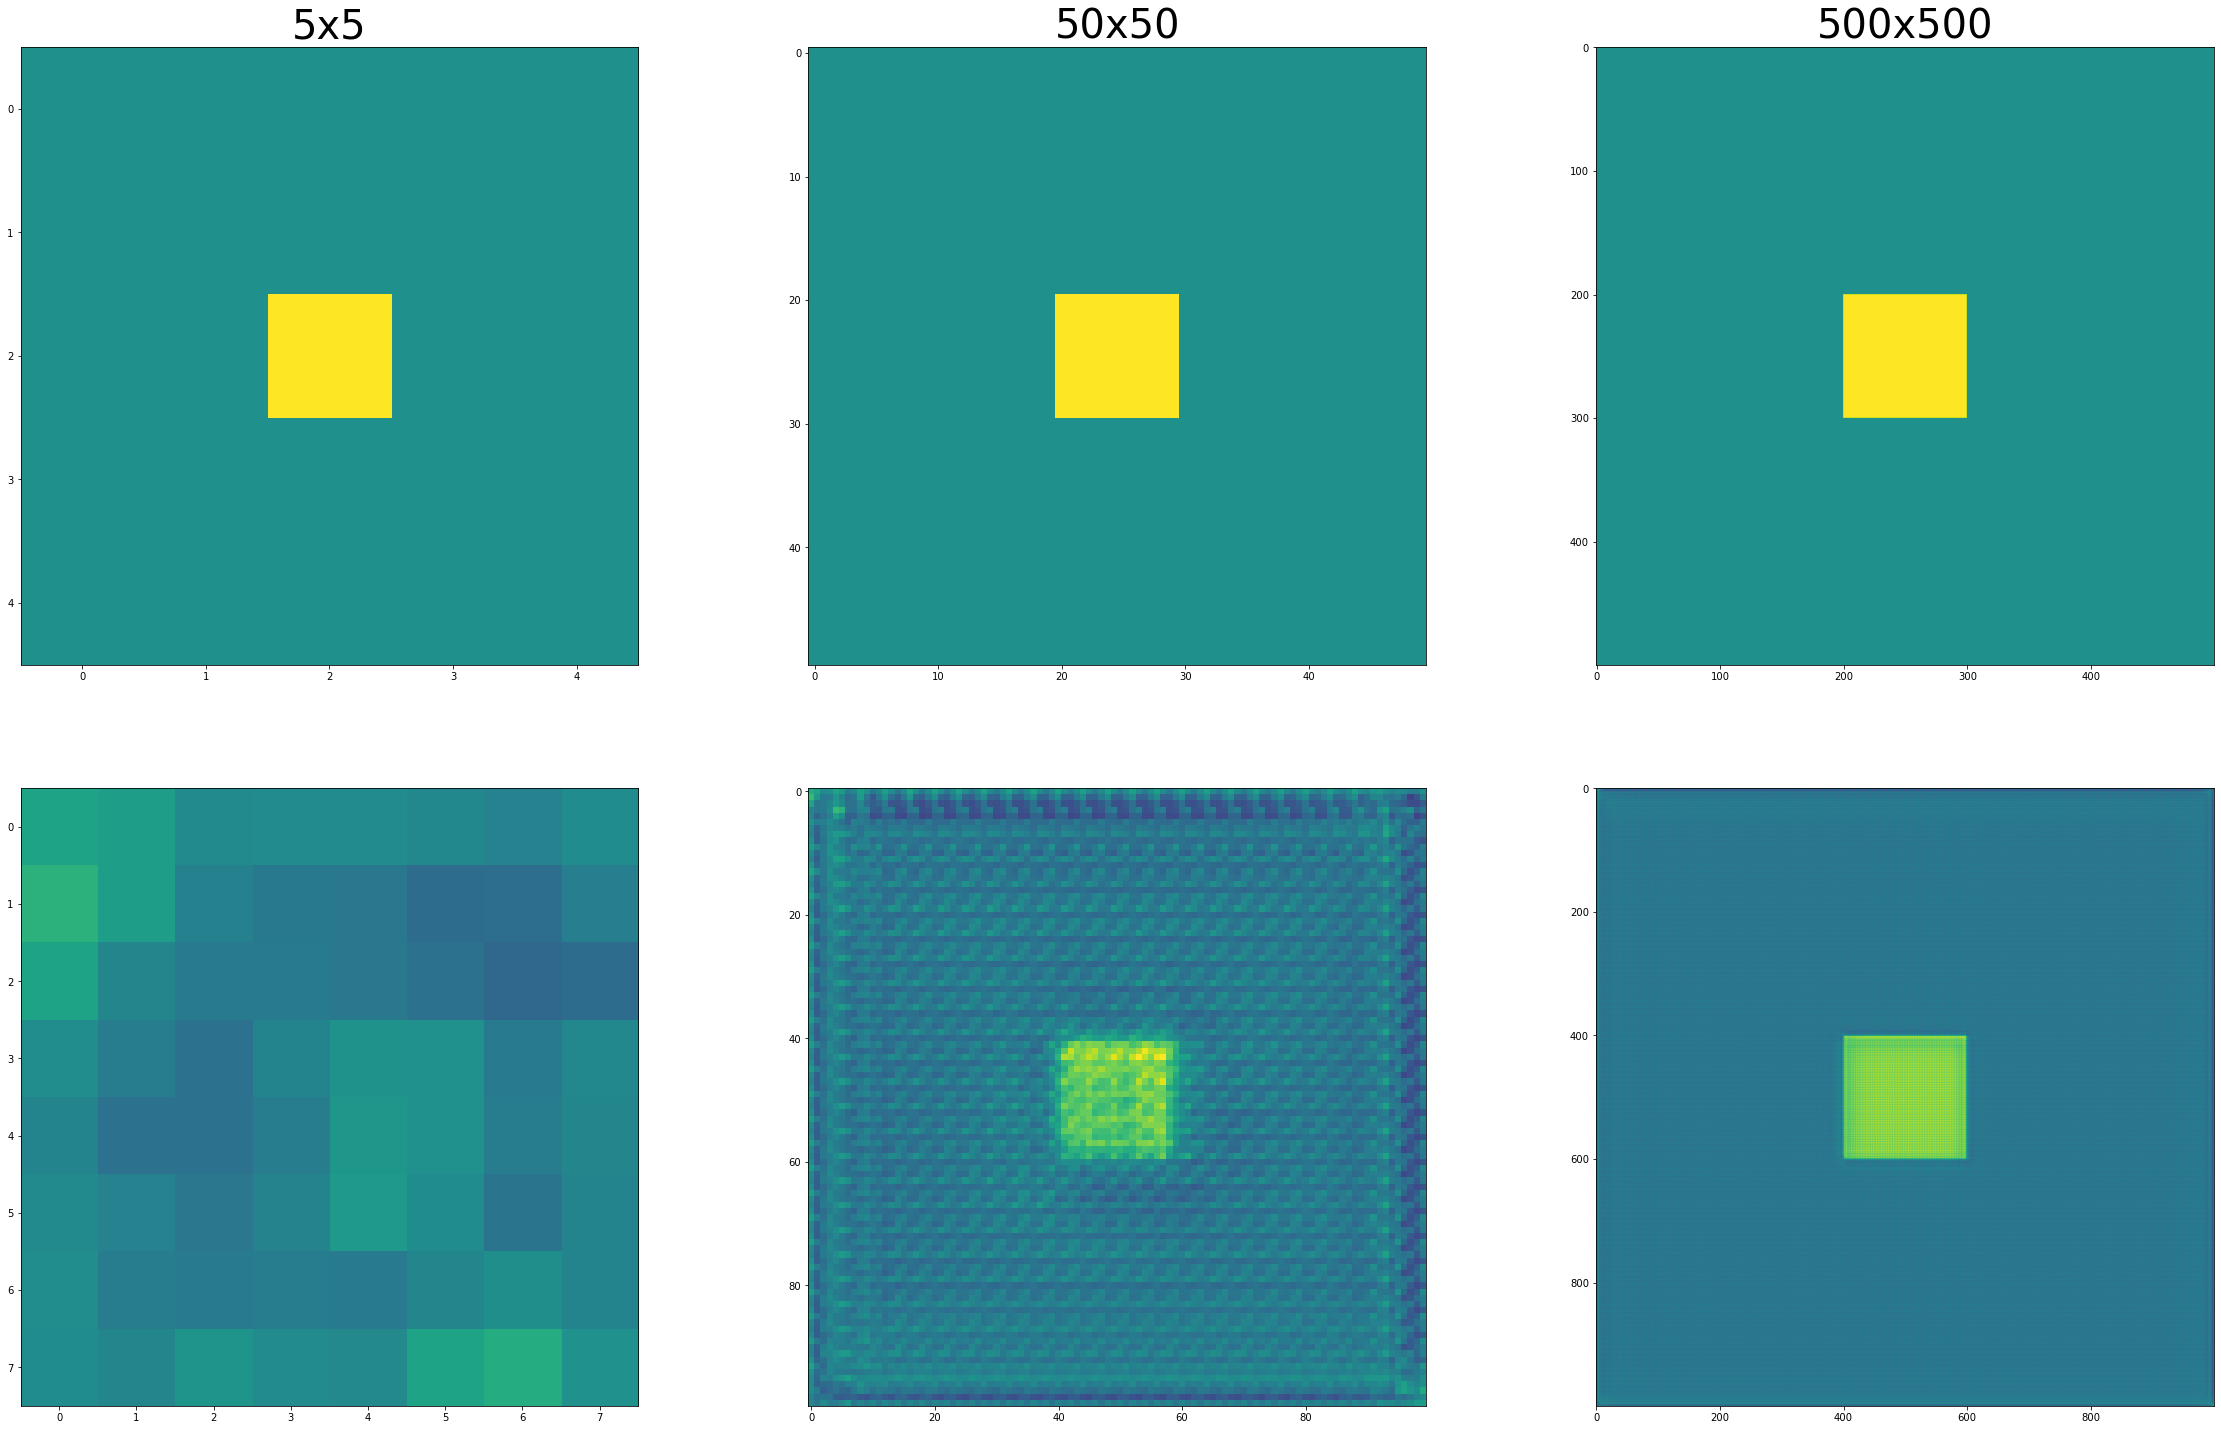

In [16]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(40, 25))

fontsize = 40
maxi = 0.5
mini = -0.5

ax1[0].imshow(original_small, vmin = mini, vmax = maxi)
ax1[0].set_title("5x5", fontsize = fontsize)
ax1[1].imshow(original_med, vmin = mini, vmax = maxi)
ax1[1].set_title("50x50", fontsize = fontsize)
ax1[2].imshow(original_large, vmin = mini, vmax = maxi)
ax1[2].set_title("500x500", fontsize = fontsize)

ax2[0].imshow(sharpened_small, vmin = mini, vmax = maxi)
ax2[1].imshow(sharpened_med, vmin = mini, vmax = maxi)
ax2[2].imshow(sharpened_large, vmin = mini, vmax = maxi)

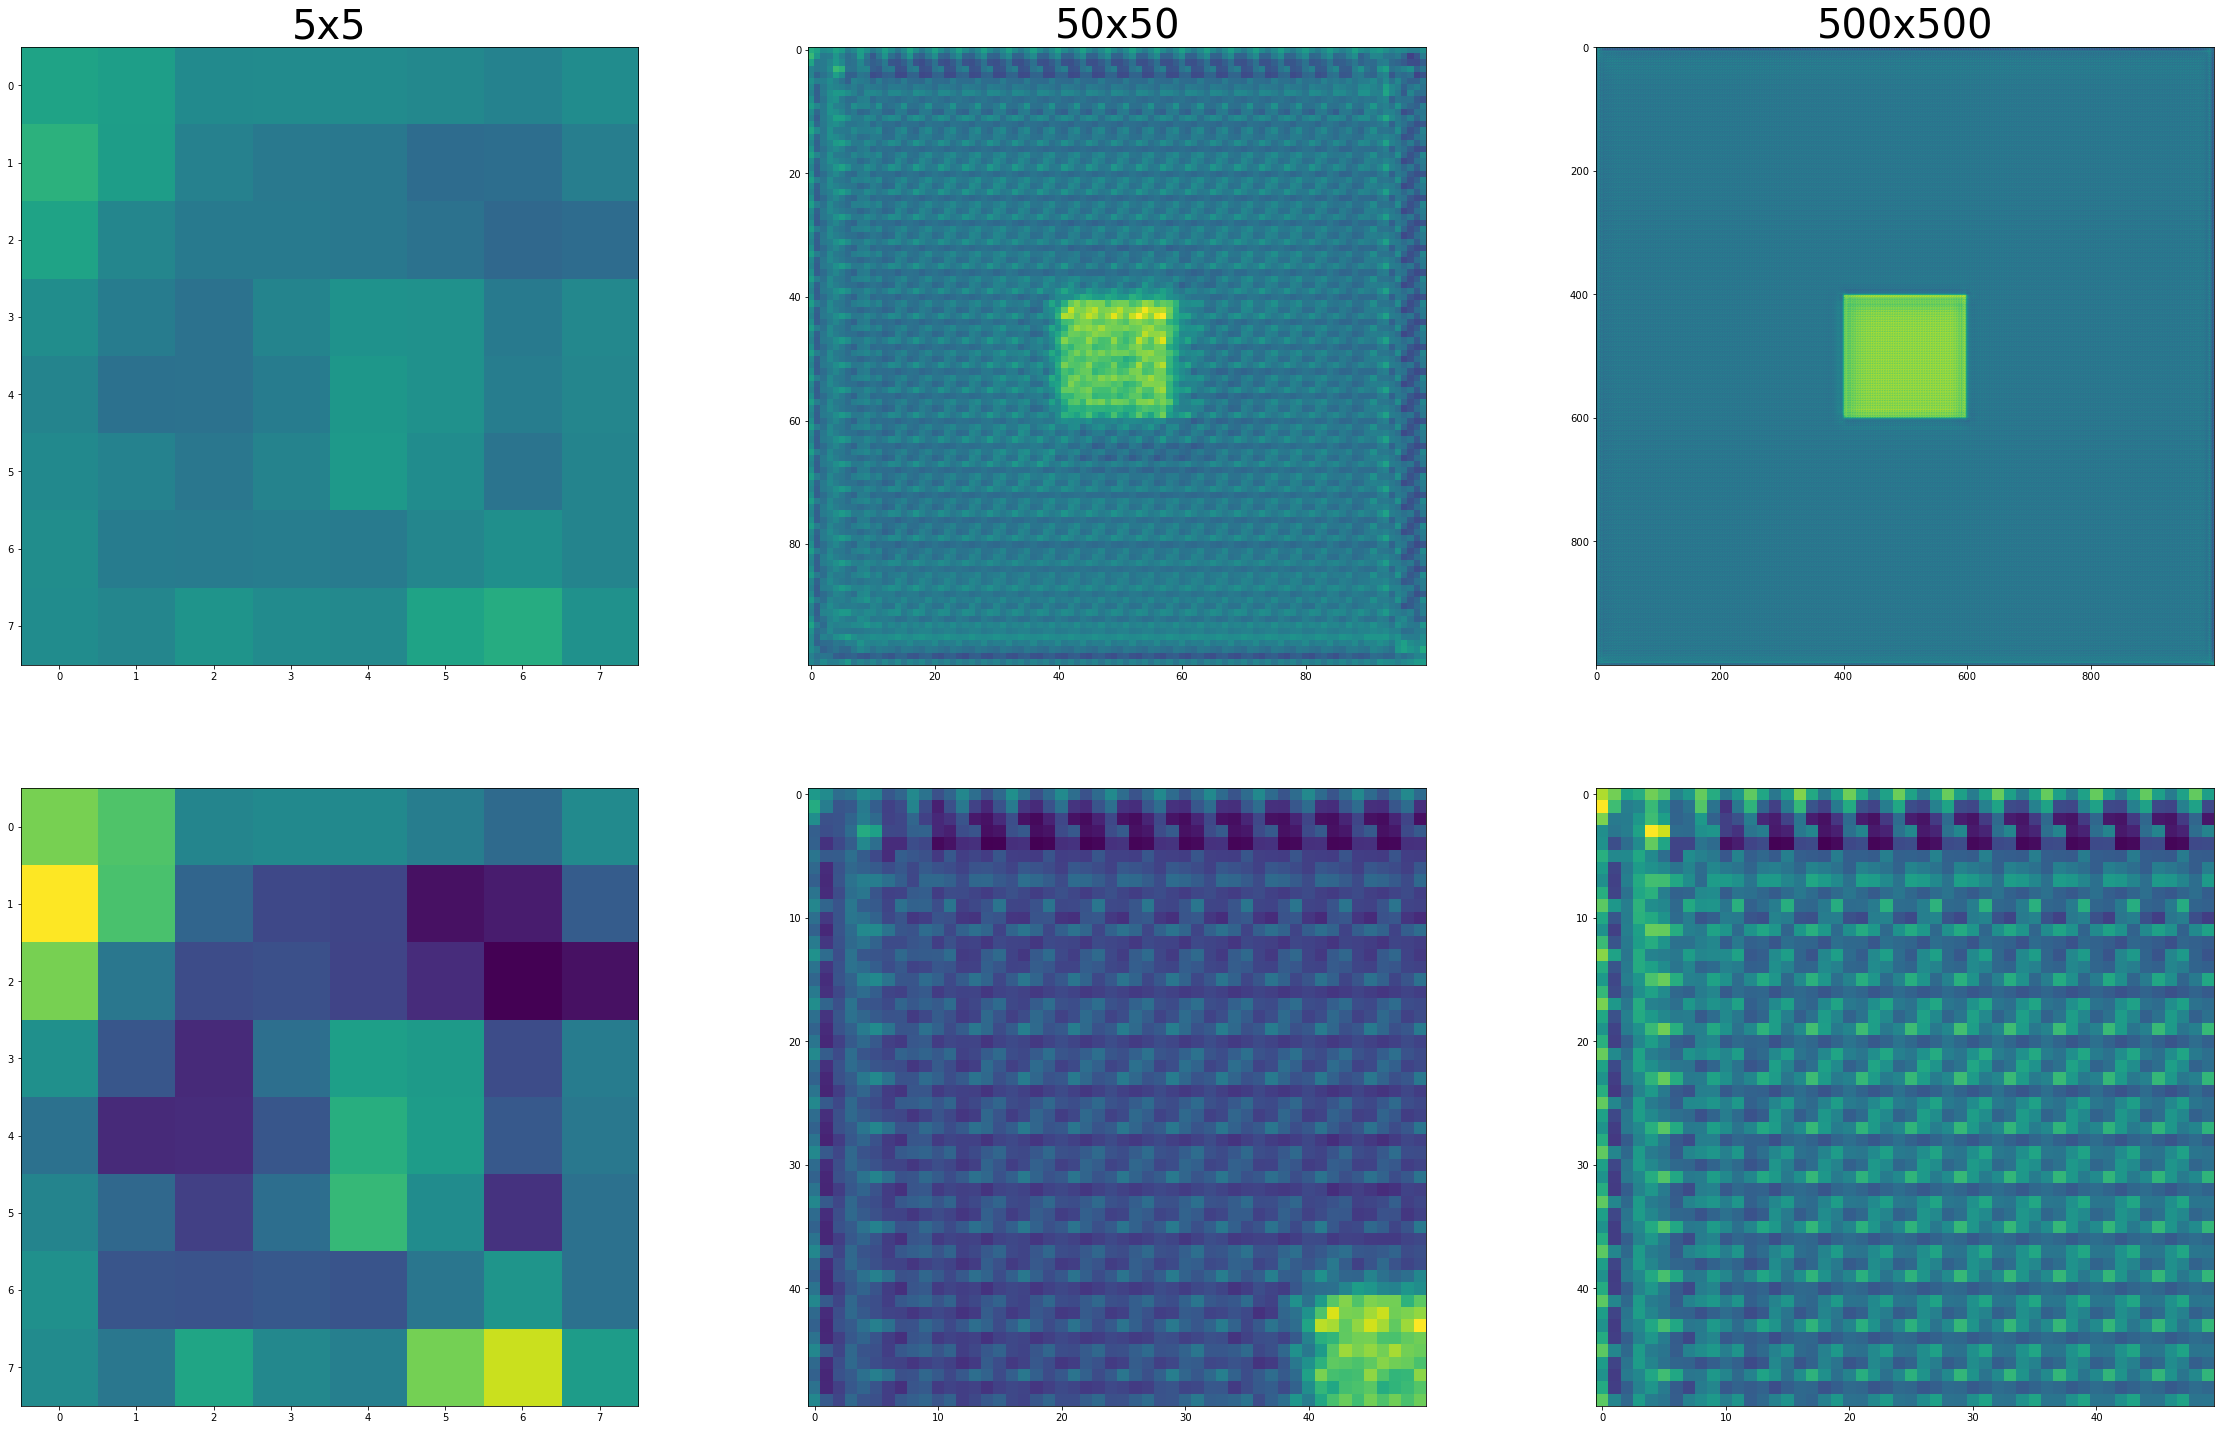

In [17]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(40, 25))

fontsize = 40
maxi = 0.5
mini = -0.5

ax1[0].imshow(sharpened_small, vmin = mini, vmax = maxi)
ax1[0].set_title("5x5", fontsize = fontsize)
ax1[1].imshow(sharpened_med, vmin = mini, vmax = maxi)
ax1[1].set_title("50x50", fontsize = fontsize)
ax1[2].imshow(sharpened_large, vmin = mini, vmax = maxi)
ax1[2].set_title("500x500", fontsize = fontsize)

ax2[0].imshow(sharpened_small)
ax2[1].imshow(sharpened_med[:50, :50])
ax2[2].imshow(sharpened_large[:50, :50])

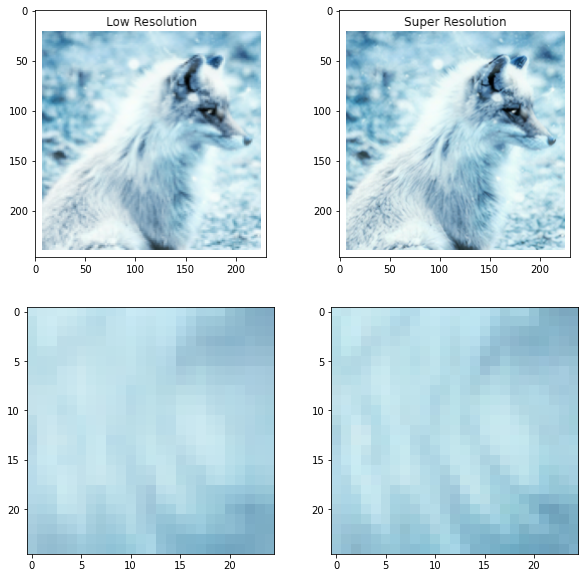

In [18]:
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))

fontsize = 40

lr = np.asarray(Image.open('LR.png'))
hr = np.asarray(Image.open('HR.png'))


x1 = 125
x2 = 150

ax1[0].imshow(lr)
ax1[1].imshow(hr)
ax2[0].imshow(lr[x1:x2, x1:x2])
ax2[1].imshow(hr[x1:x2, x1:x2])

In [19]:
img = np.asarray(Image.open('test.jpg'))
img = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3
new_img = esrgan_sharpening_img(img)

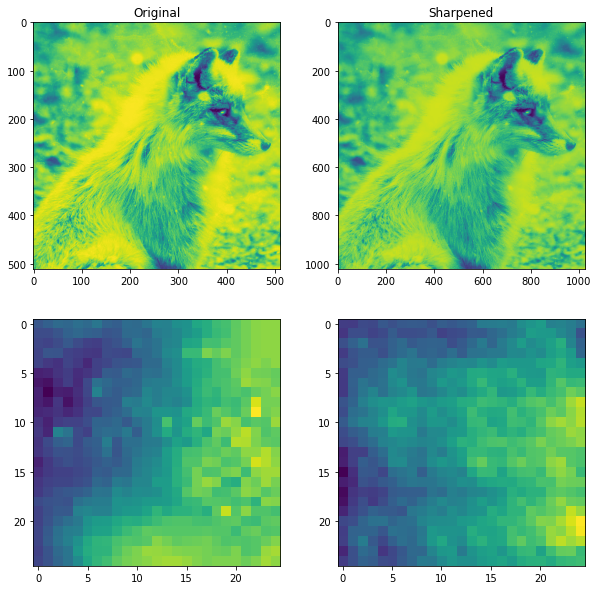

In [20]:
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))

fontsize = 40

lr = img
hr = new_img

x1 = 100
x2 = 125

ax1[0].set_title('Original')
ax1[1].set_title('Sharpened')

ax1[0].imshow(lr)
ax1[1].imshow(hr)
ax2[0].imshow(lr[x1:x2, x1:x2])
ax2[1].imshow(hr[x1:x2, x1:x2])

In [21]:
img = np.zeros((50, 50))
img[20:30, 20:30] = 1

new_img = esrgan_sharpening_img(img)

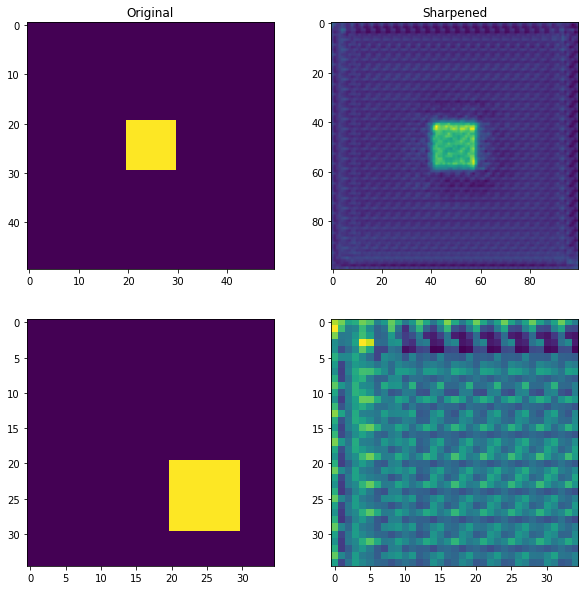

In [22]:
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))

fontsize = 40

lr = img
hr = new_img

x1 = 0
x2 = 35

ax1[0].set_title('Original')
ax1[1].set_title('Sharpened')

ax1[0].imshow(lr)
ax1[1].imshow(hr)
ax2[0].imshow(lr[x1:x2, x1:x2])
ax2[1].imshow(hr[x1:x2, x1:x2])

In [114]:
shape = (50, 50)
img1 = np.zeros(shape)
img2 = np.zeros(shape)
img3 = np.zeros(shape)

img1[10:20, 10:20] = 255
img2[20:30, 20:30] = 255
img3[30:40, 30:40] = 255

In [115]:
result = np.zeros((shape[0], shape[1], 3))
result[:,:,0]= img1
result[:,:,1]= img2
result[:,:,2]= img3

In [116]:
result.shape

(50, 50, 3)

In [101]:
new_img = esrgan_sharpening_img(img1)

In [102]:
def load_image(array):
    return result

def preprocess_image(array):
    hr_image = array
    hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 2) * 2
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
    hr_image = tf.cast(hr_image, tf.float32)
    return tf.expand_dims(hr_image, 0)

def downscale_image(image):
    height, width = image.shape
    result = np.zeros((image.shape[0]//2, image.shape[1]//2, 3))
    smallimg = resize(image, (round(height/2), round(width/2)))
    result[:,:,0] = smallimg
    result[:,:,1] = smallimg
    result[:,:,2] = smallimg
    lr_image = tf.expand_dims(result, 0)
    lr_image = tf.cast(lr_image, tf.float32)
    return lr_image

def esrgan_sharpening_img(image):
    hr_image = preprocess_image(load_image(image))
    lr_image = downscale_image(image)
    
    fake_image = model(lr_image)
    fake_image = tf.squeeze(fake_image)
    
    hr_image = tf.squeeze(hr_image).numpy()
    lr_image = tf.squeeze(lr_image).numpy()
    return fake_image.numpy()

TypeError: 'Image' object is not subscriptable

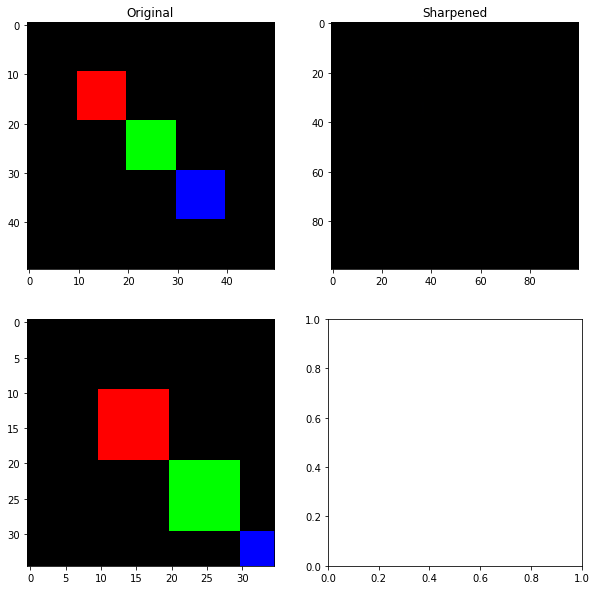

In [104]:
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))

fontsize = 40

lr = result
hr = postprocess_image(new_img)

x1 = 0
x2 = 35

ax1[0].set_title('Original')
ax1[1].set_title('Sharpened')

ax1[0].imshow(lr)
ax1[1].imshow(hr)
ax2[0].imshow(lr[x1:x2, x1:x2])
ax2[1].imshow(hr[x1:x2, x1:x2])

In [55]:
result.shape

(50, 50, 3)

In [72]:
def preprocess_image(image_path):
    hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
    if hr_image.shape[-1] == 4:
        hr_image = hr_image[...,:-1]
    hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
    hr_image = tf.cast(hr_image, tf.float32)
    return tf.expand_dims(hr_image, 0)



In [75]:
hr_image = preprocess_image("test.jpg")
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)

TypeError: 'Image' object is not subscriptable

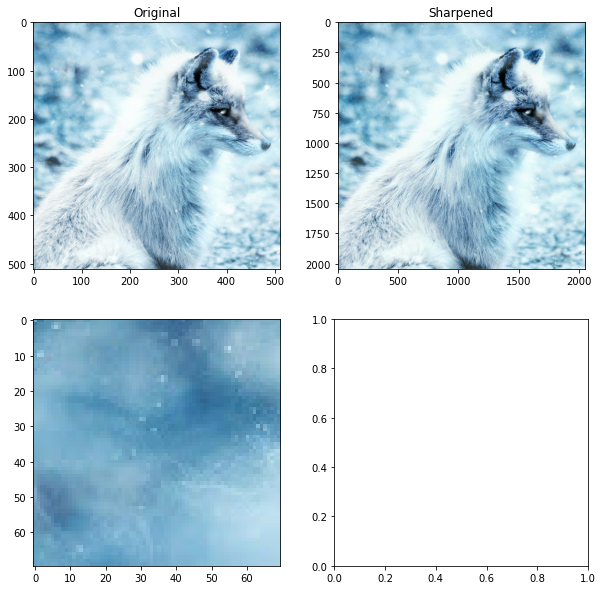

In [93]:
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))

fontsize = 40

lr = plt.imread("test.jpg")
hr = postprocess_image(fake_image)

x1 = 0
x2 = 35

ax1[0].set_title('Original')
ax1[1].set_title('Sharpened')

ax1[0].imshow(lr)
ax1[1].imshow(hr)
ax2[0].imshow(lr[x1:2*x2, x1:2*x2])
ax2[1].imshow(hr[x1:2*x2, x1:2*x2])

In [131]:
# Declaring Constants
IMAGE_PATH = result
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

def preprocess_image(image_path):
#     hr_image = tf.image.decode_image(tf.io.read_file(image_path))
    hr_image = image_path
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
    if hr_image.shape[-1] == 4:
        hr_image = hr_image[...,:-1]
    hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
    hr_image = tf.cast(hr_image, tf.float32)
    return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
    if not isinstance(image, Image.Image):
        image = tf.clip_by_value(image, 0, 255)
        image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
    image.save("%s.jpg" % filename)
    print("Saved as %s.jpg" % filename)
    
%matplotlib inline
def plot_image(image, title=""):
    image = np.asarray(image)
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
    plt.imshow(image)
    plt.axis("off")
    plt.title(title)

hr_image = preprocess_image(IMAGE_PATH)
model = hub.load(SAVED_MODEL_PATH)
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)

In [118]:
def postprocess_image(img):
    new_img = tf.clip_by_value(np.asarray(tf.squeeze(img)), 0, 255)
    new_img = Image.fromarray(tf.cast(new_img, tf.uint8).numpy())
    return new_img

Saved as Original Image.jpg


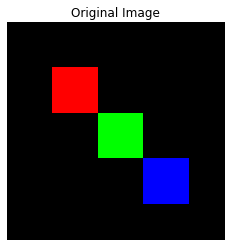

In [119]:
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")

In [132]:
new_hr = tf.clip_by_value(np.asarray(tf.squeeze(fake_image)), 0, 255)
new_hr = Image.fromarray(tf.cast(new_hr, tf.uint8).numpy())

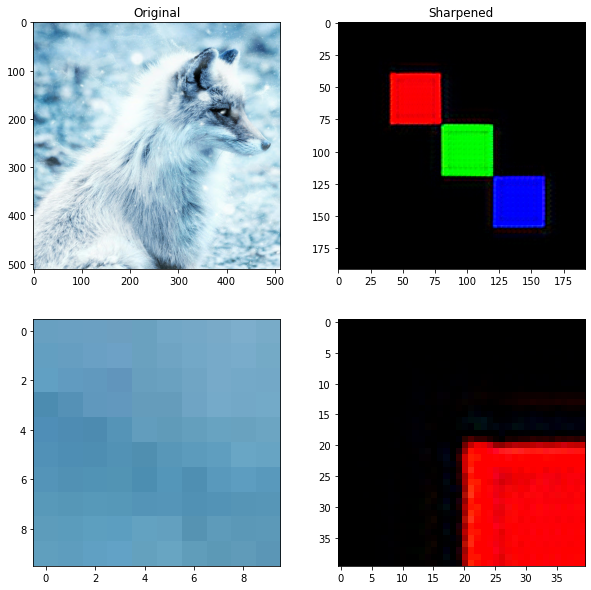

In [141]:
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))

fontsize = 40

lr = plt.imread("test.jpg")
hr = np.array(new_hr)

x1 = 20
x2 = 30

ax1[0].set_title('Original')
ax1[1].set_title('Sharpened')

ax1[0].imshow(lr)
ax1[1].imshow(hr)
ax2[0].imshow(lr[x1:x2, x1:x2])
ax2[1].imshow(hr[x1:2*x2, x1:2*x2])

In [125]:
type(hr)

PIL.Image.Image